# Global Black Box Optimization with RNNS
Project by Pattarawat Chormai and Felix Sattler ||
Supervised by Raphael Holca-Lamarre

In [1]:
# Imports
import tensorflow as tf
import numpy as np
import visualize as viz
import benchmarkfunctions as bf
import gpfunctions as gp
import lstm_model
import data

## Set all the Hyperparameters

In [2]:
# Data
load_data = False
save_data = False
dim = 2
n_train = 1600
n_test = 160
n_bumps = 6
l = 2/n_bumps*np.sqrt(dim)
n_mc_samples = 1000

# LSTM Model
n_hidden = 100
n_steps = 20

# Optimization
epochs = 100
gradient_clipping = 5.0
forget_bias = 5.0
rate_init = 0.005
rate_final = 0.0001
rate_decay = (rate_final/rate_init)**(1/epochs)
batch_size = 128
stddev = 0.00
loss_type = ["MIN", "SUM", "WSUM", "EI", "SUMMIN"][1]

# Visualization
visualize = True

## Create Training Data or load from Disk

In [3]:
# Create Data or Load Data from Disk
if load_data:
    X_train, A_train, min_train, max_train, X_test, A_test, min_test, max_test = data.load_data
else:
    X_train, A_train, min_train, max_train, X_test, A_test, min_test, max_test = \
                                    data.gen_data(n_train, n_test, dim, n_bumps, l, n_mc_samples)
# Save Data to Disk
if save_data:
    save_data(n_train, n_test, dim, n_bumps, l, n_mc_samples = 100)
        
data_train = (X_train, A_train, min_train, max_train)
data_test = (X_test, A_test, min_test, max_test)

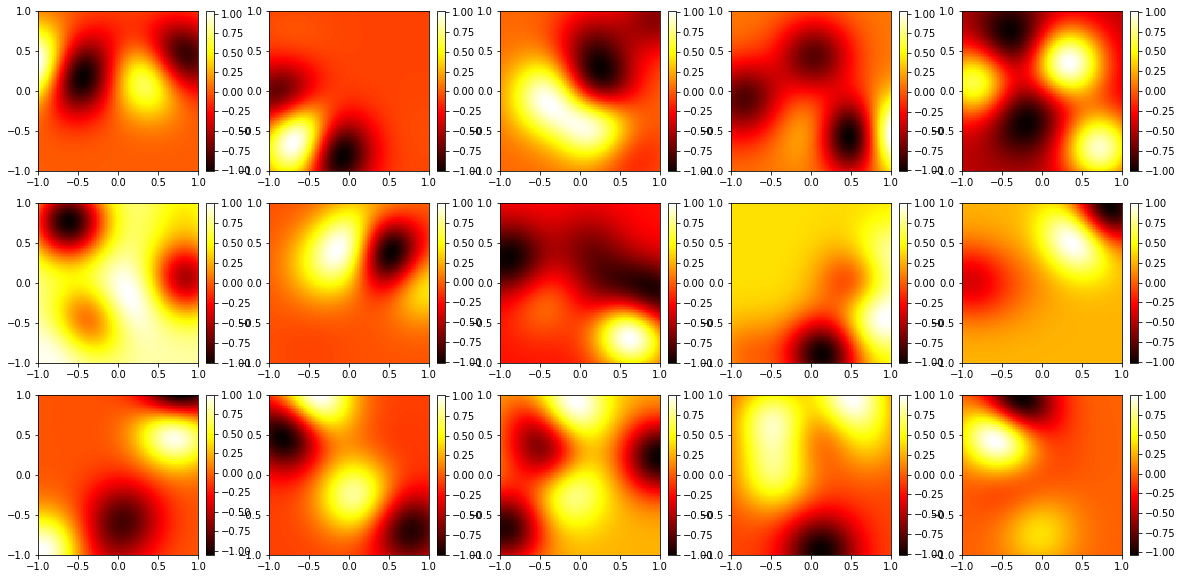

In [4]:
# Visualize Training Data
if visualize: viz.plot_gp_data_sample(15, X_train, A_train, min_train, max_train, l)

## Build the Training Graph

In [5]:
# Build the training graph, collect placeholders, sample sequence and lstmcell parameters 
placeholders, samples_x, samples_y, cell, weights = \
    lstm_model.build_training_graph(n_bumps, dim, n_hidden, forget_bias, n_steps, l)

## Start a Session and start training

In [ ]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [ ]:
train_logs = lstm_model.train_model(sess, placeholders, samples_y, epochs, batch_size, data_train, data_test,
                     rate_init, rate_decay, gradient_clipping, loss_type,  log = True)

Ep:    0 | TrainLoss: -3.378 | TrainMin: -0.386 | TestLoss: -2.054 | TestMin: -0.325
Ep:    1 | TrainLoss: -3.956 | TrainMin: -0.382 | TestLoss: -2.910 | TestMin: -0.321
Ep:    2 | TrainLoss: -4.149 | TrainMin: -0.399 | TestLoss: -3.283 | TestMin: -0.347
Ep:    3 | TrainLoss: -4.435 | TrainMin: -0.392 | TestLoss: -3.273 | TestMin: -0.327
Ep:    4 | TrainLoss: -4.563 | TrainMin: -0.393 | TestLoss: -3.472 | TestMin: -0.333
Ep:    5 | TrainLoss: -4.702 | TrainMin: -0.406 | TestLoss: -3.663 | TestMin: -0.347
Ep:    6 | TrainLoss: -4.808 | TrainMin: -0.414 | TestLoss: -3.656 | TestMin: -0.351
Ep:    7 | TrainLoss: -5.148 | TrainMin: -0.432 | TestLoss: -3.935 | TestMin: -0.371
Ep:    8 | TrainLoss: -5.444 | TrainMin: -0.447 | TestLoss: -4.351 | TestMin: -0.389
Ep:    9 | TrainLoss: -5.618 | TrainMin: -0.452 | TestLoss: -4.472 | TestMin: -0.394
Ep:   10 | TrainLoss: -5.766 | TrainMin: -0.450 | TestLoss: -4.609 | TestMin: -0.392


In [ ]:
viz.visualize_learning(train_logs)

## Evaluate the Model on Training Data

In [ ]:
# Show results on Training Data
samples_train_x, samples_train_y = \
        lstm_model.get_samples(sess, placeholders, samples_x, samples_y, data_train)
    
viz.plot_gp_results_sample(10, X_train, A_train, min_train, max_train, l, samples_train_x, samples_train_y)

## Evaluate the Model on Test Data

In [ ]:
# Show results on Test Data
samples_test_x, samples_test_y = \
        lstm_model.get_samples(sess, placeholders, samples_x, samples_y, data_test)

viz.plot_gp_results_sample(10, X_test, A_test, min_test, max_test, l, samples_test_x, samples_test_y)

## Evaluate the Model on Benchmark Functions

In [ ]:
f_bm = [bf.branin, bf.goldstein_price, bf.hartmann3, bf.hartmann6][1]
f_bm_tf = [bf.branin_tf, bf.goldstein_price_tf, bf.hartmann3_tf, bf.hartmann6_tf][1]

In [ ]:
samples_benchmark_x, samples_benchmark_y = \
        lstm_model.get_benchmark_samples(sess, f_bm_tf, cell, weights, dim, n_hidden, 20)

In [ ]:
viz.plot_result(f_bm, dim, 1, samples_benchmark_x, samples_benchmark_y)